# Demo to download one file from NWM retrospective

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime
def generate_filename(year, month, day, hour, product, domain):
    # Create a datetime object from the input year, month, day and hour
    date = datetime.datetime(year, month, day, hour)

    # Create the filename using the strftime function to format the date, and the format function to insert the product and domain
    filename = "{}/{:%Y%m%d%H}00.{}_{}.comp".format(date.year, date, product, domain)

    return filename

# Example usage:
filename = generate_filename(1979, 2, 1, 4, 'LAKEOUT', 'DOMAIN1')
print(filename)

1979/197902010400.LAKEOUT_DOMAIN1.comp


In [3]:
!pip install boto3 xarray botocore -q

import boto3
import xarray as xr
from botocore import UNSIGNED
from botocore.client import Config

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# Specify your NWM bucket and the object key for the netCDF file you're interested in
# bucket_name = 'noaa-nwm-retrospective-2-1-pds'
# key = 'model_output/'  # This will need to be specified in more detail

# Download the file and load it into an xarray Dataset
# s3.download_file(bucket_name, key+filename, filename)
s3 = boto3.Session().client('s3', config=Config(signature_version=UNSIGNED))

bucket_name = 'noaa-nwm-retrospective-2-1-pds'
key = 'model_output/'+filename
savename = '../data/'+filename.split('/')[-1]

# Download the file and save it as 'local_filename.comp'
s3.download_file(bucket_name, key, savename)
ds = xr.open_dataset(savename)

In [4]:
ds

<xarray.Dataset>
Dimensions:                      (time: 1, reference_time: 1, feature_id: 5783)
Coordinates:
  * time                         (time) datetime64[ns] 1979-02-01T04:00:00
  * reference_time               (reference_time) datetime64[ns] 1979-02-01
  * feature_id                   (feature_id) int32 491 531 ... 1021092845
    latitude                     (feature_id) float32 ...
    longitude                    (feature_id) float32 ...
Data variables:
    crs                          |S1 ...
    reservoir_type               (feature_id) int32 ...
    reservoir_assimilated_value  (feature_id) float32 ...
    water_sfc_elev               (feature_id) float32 ...
    inflow                       (feature_id) float64 ...
    outflow                      (feature_id) float64 ...
Attributes:
    TITLE:                      OUTPUT FROM WRF-Hydro v5.2.0-beta2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  1979-02-01_00:00:00
    station_dimension:          lake_id
    model_output_valid_time:    1979-02-01_04:00:00
    model_total_valid_times:    1416
    Conventions:                CF-1.6
    code_version:               v5.2.0-beta2
    model_output_type:          reservoir
    model_configuration:        retrospective

In [5]:
to_be_select_feature_id = ds.feature_id.values
to_be_select_feature_id

array([       491,        531,        747, ...,  947070203,  947070204,
       1021092845])

In [6]:
i_id = 2
streamflow_df = ds.sel(feature_id=to_be_select_feature_id[i_id], method='nearest').to_dataframe()
streamflow_df.head()

,,crs,feature_id,reservoir_type,reservoir_assimilated_value,latitude,longitude,water_sfc_elev,inflow,outflow
time,reference_time,,,,,,,,,
1979-02-01 04:00:00,1979-02-01,b'',747,1,-9999.0,46.034088,-68.064995,190.356781,0.03,0.13


In [7]:
all_latitude = np.array([ds.sel(feature_id=to_be_select_feature_id[i_id], method='nearest').latitude.values \
                         for i_id in range(len(to_be_select_feature_id))])
all_longitude = np.array([ds.sel(feature_id=to_be_select_feature_id[i_id], method='nearest').longitude.values \
                         for i_id in range(len(to_be_select_feature_id))])

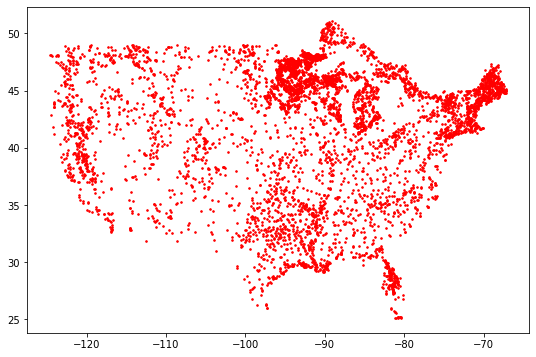

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.scatter(all_longitude, all_latitude, marker='.', s=10, color='r')

plt.show()